In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Improving Regression


- Coding Qualitative Variables
- Polynomial Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### Qualitative Features

To this point, we've only examined quantitative features.  Here, we follow an example where we can incorporate some qualitative features into our analysis.  In our dataset below, we have four variables that are qualitative:

    Gender, Student, Married, Ethnicity
    
We begin by considering the relationship between `Gender` and `Balance`.

In [3]:
credit = pd.read_csv('data/credit.csv', index_col = 'Unnamed: 0')

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [5]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
from pandas.plotting import scatter_matrix

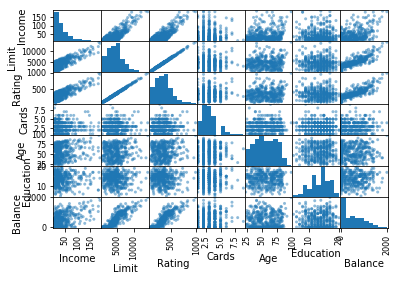

In [9]:
scatter_matrix(credit);

In [10]:
lm = smf.ols('Balance ~ Gender', data = credit).fit()

In [11]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.002    
Dependent Variable: Balance          AIC:                6042.5268 
Date:               2018-08-07 20:09 BIC:                6050.5097 
No. Observations:   400              Log-Likelihood:     -3019.3   
Df Model:           1                F-statistic:        0.1836    
Df Residuals:       398              Prob (F-statistic): 0.669     
R-squared:          0.000            Scale:              2.1181e+05
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        509.8031  33.1281 15.3889 0.0000 444.6752 574.9310
Gender[T.Female]  19.7331  46.0512  0.4285 0.6685 -70.8009 110.2671
-------------------------------------------------------------------
Omnibus:              28.438        Durbin-Watson:           1.940 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        27.346
Skew:                 0.583         Prob(JB):                0.000 
Kurtosis:             2.471         Condition No.:           3     
===================================================================

"""

In [12]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [14]:
credit['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [22]:
gender_dummies = pd.get_dummies(credit.Gender, drop_first=1)

In [23]:
gender_dummies.columns

Index(['Female'], dtype='object')

In [26]:
lr = LinearRegression()
lr.fit(gender_dummies['Female'].values.reshape(-1,1), credit['Balance'])
predictions = lr.predict(gender_dummies['Female'].values.reshape(-1,1))
mse = mean_squared_error(predictions, credit.Balance)
print(mse)

210752.54999098898


In [27]:
np.sqrt(mse)

459.0779345503212

In [28]:
lr.coef_

array([19.73312308])

In [29]:
lr.intercept_

509.8031088082901

# Max Note:  We've fit the model with gender, and it shows that males have a balance of (coef) and females have coef+19.  Not very accurate

### Interpretation and Dummy Variables

The idea above is that the equation can be understood as the intercept meaning the average for the 0 category, and the coefficient as the difference between the two categories.  Further, the sum of the intercepts would be the average value for the 1 category.  

As we've discussed, we want to introduce quantitative data to many machine learning algorithms, so we should consider adding a dummy variable for this column.  We can follow our earlier example.

In [30]:
gender_dummies = pd.get_dummies(credit.Gender, prefix='Gender')

In [31]:
gender_dummies.head()

,Gender_ Male,Gender_Female
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0


In [32]:
credit['Gender_Female'] = gender_dummies['Gender_Female']

In [33]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_Female
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [34]:
gender_model = smf.ols('Balance ~ Gender_Female', data = credit).fit()
gender_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.002    
Dependent Variable: Balance          AIC:                6042.5268 
Date:               2018-08-07 20:23 BIC:                6050.5097 
No. Observations:   400              Log-Likelihood:     -3019.3   
Df Model:           1                F-statistic:        0.1836    
Df Residuals:       398              Prob (F-statistic): 0.669     
R-squared:          0.000            Scale:              2.1181e+05
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        509.8031  33.1281 15.3889 0.0000 444.6752 574.9310
Gender_Female     19.7331  46.0512  0.4285 0.6685 -70.8009 110.2671
-------------------------------------------------------------------
Omnibus:              28.438        Durbin-Watson:           1.940 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        27.346
Skew:                 0.583         Prob(JB):                0.000 
Kurtosis:             2.471         Condition No.:           3     
===================================================================

"""

#### Problem

Using the `Credit` dataset above, add encoding to the other binary categorical variables.  Fit a basic Linear Model to one or two of these new columns against the `Balance` column.  Interpret your findings in terms of the categories.

In [35]:
student_dummies = pd.get_dummies(credit.Student, prefix = 'student')

In [36]:
student_dummies.head()

,student_No,student_Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [37]:
married_dummies = pd.get_dummies(credit.Married, prefix = 'married')

In [38]:
married_dummies.head()

,married_No,married_Yes
1,0,1
2,0,1
3,1,0
4,1,0
5,0,1


In [39]:
credit['not_married'] = married_dummies['married_No']
credit['not_student'] = student_dummies['student_No']

In [40]:
X = credit[['not_married', 'not_student']]
y = credit.Balance

In [41]:
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
print('MSE:', mse, '\nRMSE:', rmse)

MSE: 196660.6932524375 
RMSE: 443.46442163090995


In [42]:
lr.coef_

array([ -13.52450331, -398.14611847])

In [43]:
lr.intercept_

883.5872516556294

### More than two Categories

Here, we need more than one dummy variable and will subsequently run a linear regression on a both of these columns and interpret the data accordingly.  In our credit dataset, we have a three valued column with `Ethnicity`.  From this, we will create a model where:

$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \epsilon_i $$

where $x_{i1} = 1$ if the $i$th person is Asian and 0 otherwise, and similarly $x_{i2}$ for Caucasian.  Again, this assignment is arbitrary.  However, we can interpret the model as:

- $\beta_0 + \beta_1 + \epsilon_i$: if $i$th person is Asian
- $\beta_0 + \beta_2 + \epsilon_i$: if $i$th person is Caucasian
- $\beta_0 +\epsilon_i$: if $i$th person is African American

In [44]:
credit['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [45]:
ethn_dummies = pd.get_dummies(credit.Ethnicity)

In [46]:
ethn_dummies.head()

,African American,Asian,Caucasian
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1


In [47]:
credit['ethn_asian'] = ethn_dummies['Asian']
credit['ethn_cauc'] = ethn_dummies['Caucasian']

In [48]:
lin_tre = smf.ols('Balance ~ ethn_asian + ethn_cauc', data = credit).fit()

In [49]:
lin_tre.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.005    
Dependent Variable: Balance          AIC:                6044.6238 
Date:               2018-08-07 20:27 BIC:                6056.5982 
No. Observations:   400              Log-Likelihood:     -3019.3   
Df Model:           2                F-statistic:        0.04344   
Df Residuals:       397              Prob (F-statistic): 0.957     
R-squared:          0.000            Scale:              2.1240e+05
--------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
--------------------------------------------------------------------
Intercept   531.0000   46.3187  11.4641  0.0000   439.9394  622.0606
ethn_asian  -18.6863   65.0211  -0.2874  0.7740  -146.5149  109.1424
ethn_cauc   -12.5025   56.6810  -0.2206  0.8255  -123.9350   98.9300
-------------------------------------------------------------------
Omnibus:              28.829        Durbin-Watson:           1.946 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        27.395
Skew:                 0.581         Prob(JB):                0.000 
Kurtosis:             2.460         Condition No.:           4     
===================================================================

"""

We interpret these results as saying that the balance for African Americans is \$531.00, the Asian category has \$18.69 less than this, and the Caucasian category will carry \$12.50 less than the African American category.

### Problem

Examine a multiple regression model on the `Credit` dataset provided after appropriately coding all categorical variables and dealing with any missing values.  Make a single markdown cell containing a scatterplot and the fitted line and the RMSE. (to save a plot you can type `plt.savefig()` and pass a filename for saving the image, subsequently displaying it in a markdown cell with `![](path/to/image.png)`)

In [50]:
credit.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'Gender_Female',
       'not_married', 'not_student', 'ethn_asian', 'ethn_cauc'],
      dtype='object')

In [66]:
dums = pd.get_dummies(credit,drop_first=True)

In [68]:
dums.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,not_married,not_student,ethn_asian,ethn_cauc,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,0,0,1,0,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,1,1,1,0,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,1,1,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,0,0,1,0,1


In [61]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 16 columns):
Income           400 non-null float64
Limit            400 non-null int64
Rating           400 non-null int64
Cards            400 non-null int64
Age              400 non-null int64
Education        400 non-null int64
Gender           400 non-null object
Student          400 non-null object
Married          400 non-null object
Ethnicity        400 non-null object
Balance          400 non-null int64
Gender_Female    400 non-null uint8
not_married      400 non-null uint8
not_student      400 non-null uint8
ethn_asian       400 non-null uint8
ethn_cauc        400 non-null uint8
dtypes: float64(1), int64(6), object(4), uint8(5)
memory usage: 39.5+ KB


In [62]:
lr = LinearRegression()

In [76]:
X = dums[['Education', 'Income', 'Rating', 'Age', 'Gender_Female', 'Married_Yes']] 
y= dums.Balance
lr.fit(X,y)
pred = lr.predict(X)
np.sqrt(mean_squared_error(pred,y))


160.48950851127918

# The main point of the class until this point is to understand that we should encode categorical values by creating dummies (important to drop one so that they don't add up to 1--still not entirely clear why this is important, but I don't think that will matter) 

### Train/Test

Now we're going to learn how to use sklearn to do a train/test split


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#default is 75% training, 25% testing

In [86]:
#the machine learning way 

#fit on train, predit on test

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([ 636.58151544,  159.70100743,  196.47302359,  372.13195878,
          5.12863453,  687.81018199,  970.92921642, 1073.19291856,
        163.98645954, 1336.94525603,  516.53736558,  204.64172568,
        117.41312501, -140.25197057,  556.54239136,  952.37051201,
        945.48387667,  869.22537508, -174.22021827,  -74.14620725,
        236.46827682, 1155.87571325,  199.68363443,  172.70096708,
        820.97426208,  925.97900901,   69.32728825,  841.92459798,
        180.99528504, -160.60878035, 1295.13267111,  674.06671989,
       1224.39383252,  482.52980282,  312.462884  ,  958.75964195,
        339.09980339,  802.61656139,  882.98317723,  386.49756924,
         90.32588033,  519.2911727 ,  710.70122504,  422.86727666,
        -31.21624047,  524.65557263, -138.75595868, 1308.28165571,
        816.04442357, 1344.84575441,  704.16250349,  -54.57392081,
        495.77264998,  355.61141085,  347.80435874,  756.35928041,
        327.5394348 ,  950.74202394,  820.07492146,  185.39324

In [87]:
np.sqrt(mean_squared_error(pred, y_test))

181.9154096866353

In [ ]:
#While the RMS error above is slightly higher than the RMS on 
#the non-split data, it is more representative of how the model actually performs.

In [ ]:
# Even better is cross validation.  IT's basically taking the training data and slicing it into folds.
# Each fold is then used as a "test" set, which is evaluated on a model built using all the other folds.

In [88]:
from sklearn.model_selection import cross_val_score
#The most important things are:
# Estimator = the model itself
# cv= the number of "folds" (3 means 3 folds)

In [90]:
cross_val_score(lr, X_train, y_train, cv = 5)
#returns an array of scores.  Here, the default score is R-squared, the default score for linear regression

array([0.89573822, 0.87122163, 0.91637168, 0.90206932, 0.79354846])

### Polynomial Regression

While we see what the relationship between these variables modeled as a straight line would be, but could a polynomial shape do better?  Let's first consider the simple polynomial case.  

In [96]:
mpg = pd.read_csv('data/mtcars.csv')

In [97]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


<IPython.core.display.Javascript object>


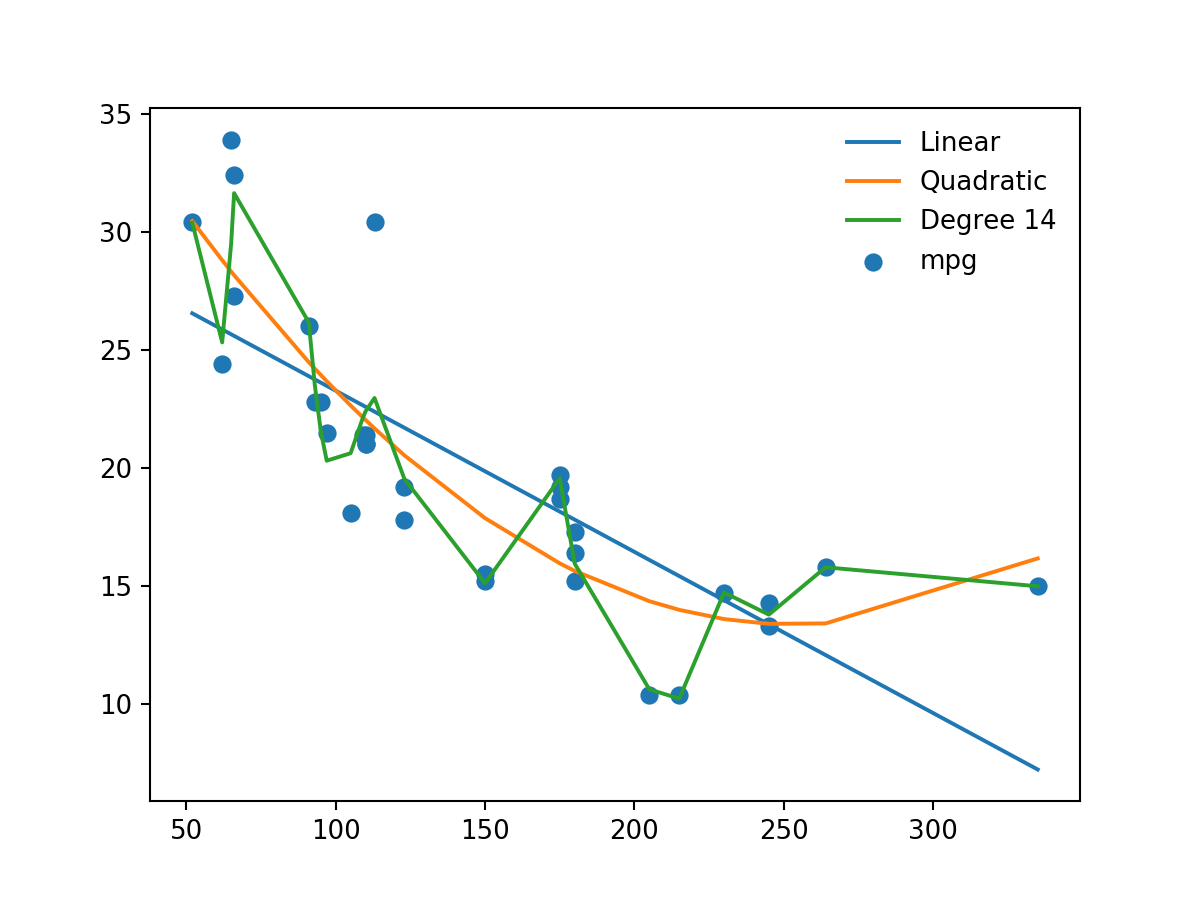

In [98]:
plt.figure()
plt.scatter(mpg['hp'], mpg['mpg'])

In [99]:
lin = np.polyfit(mpg['hp'], mpg['mpg'], 1)
lin_p = np.poly1d(lin)

x = mpg['hp'].sort_values()
plt.plot(x, lin_p(x), label = 'Linear')

In [100]:
quad = np.polyfit(mpg['hp'], mpg['mpg'], 2)
quad_p = np.poly1d(quad)

plt.plot(x, quad_p(x), label = 'Quadratic')

In [101]:
many = np.polyfit(mpg['hp'], mpg['mpg'], 14)
big_p = np.poly1d(many)

plt.plot(x, big_p(x), label = 'Degree 14')
plt.legend(frameon = False)

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [104]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [105]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [106]:
pred = pipe.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(pred, y_test))

185.29346035858214

**Determining Shape**


One way to look at whether there is a quadratic relationship between variables is to examine the graph of the residuals.  Below, we construct residual plots for the linear and quadratic case that include a fitted line.  Note the lack of pattern in the quadratic fit.

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.residplot(mpg['mpg'], mpg['hp'], lowess = True)

plt.subplot(1, 2, 2)
sns.residplot(mpg['mpg'], mpg['hp'], order = 2, lowess = True)

### More than One Polynomial Feature

While a polynomial in 2-Dimensions looks like

$$ y = a_0 + a_1x + a_2x^2 + ... + a_nx^n $$

A quadratic polynomial in 3-Dimensions could look something like:

$$ f(x, y) = ax^2 + bx + cy^2 + dy + exy  + f$$

Note the existence of the $exy$ term, where the variables $x$ and $y$ interact.  We can see something like this in our advertising data.  Let's first create a new column that combines the TV and radio columns through multiplication.  We can consider this in a 2D plot against sales.

In [ ]:
ads['TVradio'] = ads.TV * ads.radio

In [ ]:
ads.head()

In [ ]:
plt.figure()
plt.scatter(ads['TVradio'], ads['sales'])

In [ ]:
quad = np.polyfit(ads.TVradio, ads.sales, 2)

In [ ]:
quad_p = np.poly1d(quad)

In [ ]:
x = ads.TVradio.sort_values()

In [ ]:
plt.plot(x, quad_p(x), color = 'red', linewidth = 5)

We want to include the individual terms that make up the interaction term in our original model.  Thus, we will need a 3D quadratic polynomial for our model in the advertising data.  The smoothest way I know to accomplish this is to us the `PolynomialFeatures` method from scikitlearn.  Below, we create an instance of the `PolynomialFeatures` method, create a single object containing the input variables, and fit these values with the `.fit_transform()` method.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [ ]:
X = ads[['TV', 'radio']]

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly[0]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly, ads.sales)

In [ ]:
lin_reg.intercept_

In [ ]:
lin_reg.predict(X_poly)[:10]

In [ ]:
lin_reg.score(X_poly, ads.sales)

### Pipelines and Higher Degree Fits

We could use a higher order polynomial also, examining a degree 3 polynomial with the `Pipeline` approach, combining the two operations together.  We will see much more from piplines moving forward.

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(3)),
                 ('linear', LinearRegression(fit_intercept= False))])

In [ ]:
X = ads[['TV', 'radio']]
y = ads['sales']

In [ ]:
model = model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
ads.plot(x = 'TV', y = 'sales', kind = 'scatter')
plt.scatter(ads['TV'], y = model.predict(X), color = 'red', alpha = 0.2 )

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y, model.predict(X))

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)
tree_predictions = tree_reg.predict(X)
mse = mean_squared_error(y, tree_predictions)
rmse = np.sqrt(mse)

In [ ]:
mse

In [ ]:
rmse

### Problem

Investigate the use of `PolynomialFeatures` on the `Credit` dataset.  Does a cubic polynomial significantly improve performance?

In [ ]:
credit.head()

In [ ]:
X = credit[['Limit', 'Rating', 'Education']]

In [ ]:
y = credit['Balance']
lm = LinearRegression()

In [ ]:
lm.fit(X, y)

In [ ]:
lm.score(X, y)

In [ ]:
mse = mean_squared_error(lm.predict(X), y)

In [ ]:
np.sqrt(mse)